# HOUSE PRICES ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', index_col='Id')

In [3]:
df_test = pd.read_csv('test.csv', index_col='Id')

In [4]:
len(df_train)

1460

In [5]:
len(df_test)

1459

In [6]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

MSSubClass , 0
MSZoning , 0
LotFrontage , 259
LotArea , 0
Street , 0
Alley , 1369
LotShape , 0
LandContour , 0
Utilities , 0
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 0
Exterior2nd , 0
MasVnrType , 8
MasVnrArea , 8
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinSF1 , 0
BsmtFinType2 , 38
BsmtFinSF2 , 0
BsmtUnfSF , 0
TotalBsmtSF , 0
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 1
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 0
BsmtHalfBath , 0
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 0
TotRmsAbvGrd , 0
Functional , 0
Fireplaces , 0
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageCars , 0
GarageArea , 0
GarageQual , 81
GarageCond , 81
PavedDrive , 0
WoodDeckSF , 0
Open

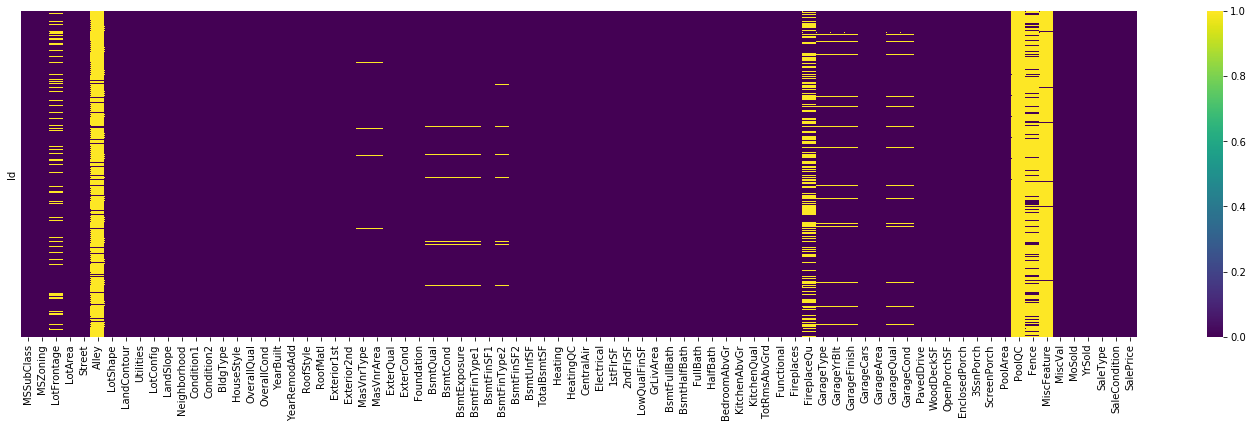

In [8]:
obj = df_train.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)
fig = plt.figure(figsize=(25,6))
sns.heatmap(df_train.isnull(), annot=False, yticklabels=False, cmap='viridis')

In [9]:
# proportions of null values:
for key,value in obj.iteritems():
    print(key,",",100*value/len(df_train))

MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 17.73972602739726
LotArea , 0.0
Street , 0.0
Alley , 93.76712328767124
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.547945205479452
MasVnrArea , 0.547945205479452
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 2.5342465753424657
BsmtCond , 2.5342465753424657
BsmtExposure , 2.6027397260273974
BsmtFinType1 , 2.5342465753424657
BsmtFinSF1 , 0.0
BsmtFinType2 , 2.6027397260273974
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
Electrical , 0.0684931506849315
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
Kitchen

In [10]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
df_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [13]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [14]:
df_train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [15]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
df_train['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [17]:
# DROP Alley, FireplaceQu, PoolQC, Fence, MiscFeature due to too many missing entries
df_train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

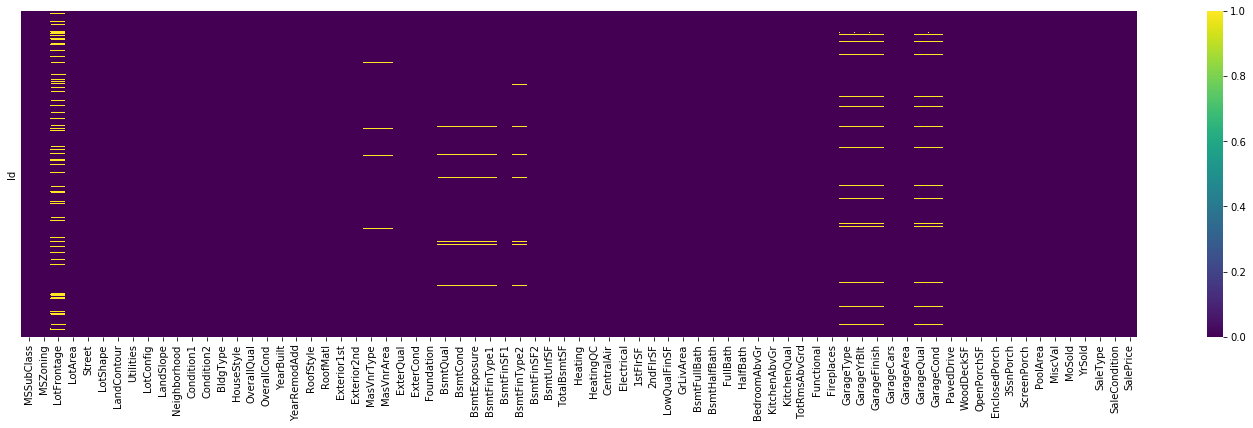

In [18]:
fig = plt.figure(figsize=(25,6))
sns.heatmap(df_train.isnull(), annot=False, yticklabels=False, cmap='viridis')

In [19]:
df_train.corr()['SalePrice'].abs().sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [20]:
# LotFrontage is a good predictor - can we impute missing values?

In [21]:
df_train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

(0, 200)

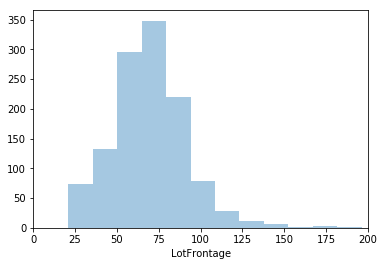

In [22]:
plt.tight_layout()
sns.distplot(df_train['LotFrontage'], kde=False, bins=20)
plt.xlim([0, 200])

(0, 30000)

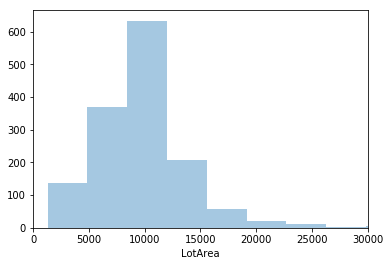

In [23]:
sns.distplot(df_train['LotArea'], kde=False, bins=60)
plt.xlim([0, 30000])

In [24]:
df_train.corr()['LotFrontage'].abs().sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
MSSubClass       0.386347
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
OverallCond      0.059213
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
BsmtHalfBath     0.007234
KitchenAbvGr     0.006069
MiscVal          0.003368
Name: LotFrontage, dtype: float64

In [25]:
# LotArea a good predictor
df_train[pd.isnull(df_train['LotFrontage'])][['LotArea', 'LotFrontage']]

,LotArea,LotFrontage
Id,,
8,10382,NaN
13,12968,NaN
15,10920,NaN
17,11241,NaN
25,8246,NaN
...,...,...
1430,12546,NaN
1432,4928,NaN
1442,4426,NaN


In [26]:
# lots of values for LotArea, but maybe we can bin these and put in a new col?
# bins of [<5000, 5000-10000, 10000-15000, 15000-20000, >20000]

def bin_lot_area(lotarea):
    if lotarea <= 5000: lotareabinned = 2500
    elif (lotarea > 5000 and lotarea <= 10000): lotareabinned= 7500
    elif (lotarea > 10000 and lotarea <= 15000): lotareabinned = 12500
    elif (lotarea > 15000 and lotarea <= 20000): lotareabinned=17500
    elif (lotarea > 20000): lotareabinned = 25000
    return lotareabinned

df_train['LotAreaBinnedTemp'] = df_train['LotArea'].apply(bin_lot_area)

In [27]:
#df_train[['LotArea','LotAreaBinnedTemp']].head(20)

In [28]:
# now groupby lotareabinned and get mean of lotfrontage
mean_lot_frontage = df_train.groupby('LotAreaBinnedTemp').mean()['LotFrontage']
mean_lot_frontage

LotAreaBinnedTemp
2500      36.691057
7500      65.858569
12500     80.959596
17500     95.166667
25000    103.272727
Name: LotFrontage, dtype: float64

In [29]:
def fill_lot_frontage(lotfrontage, lotareabinnedtemp, mean_lot_frontage): # don't actually need last arg to be defined in function - it's global
    if not pd.isnull(lotfrontage): lotfrontage = lotfrontage
    else: lotfrontage = mean_lot_frontage[lotareabinnedtemp]
    return lotfrontage

In [30]:
df_train['LotFrontageTemp'] = df_train.apply(
    lambda x: fill_lot_frontage(x['LotFrontage'], x['LotAreaBinnedTemp'], mean_lot_frontage), axis=1)

In [31]:
df_train['LotFrontageTemp'].head()

Id
1    65.0
2    80.0
3    68.0
4    60.0
5    84.0
Name: LotFrontageTemp, dtype: float64

In [32]:
df_train[['LotArea','LotAreaBinnedTemp','LotFrontage','LotFrontageTemp']].head(20)

,LotArea,LotAreaBinnedTemp,LotFrontage,LotFrontageTemp
Id,,,,
1,8450,7500,65.0,65.000000
2,9600,7500,80.0,80.000000
3,11250,12500,68.0,68.000000
4,9550,7500,60.0,60.000000
5,14260,12500,84.0,84.000000
6,14115,12500,85.0,85.000000
7,10084,12500,75.0,75.000000
8,10382,12500,NaN,80.959596
9,6120,7500,51.0,51.000000


In [33]:
# this works so remove LotAreaBinnedTemp and replace LotFrontage with LotFrontageTemp
df_train.drop(['LotAreaBinnedTemp', 'LotFrontage'], axis=1, inplace=True)

In [34]:
df_train.rename(columns={'LotFrontageTemp': 'LotFrontage'}, inplace=True)

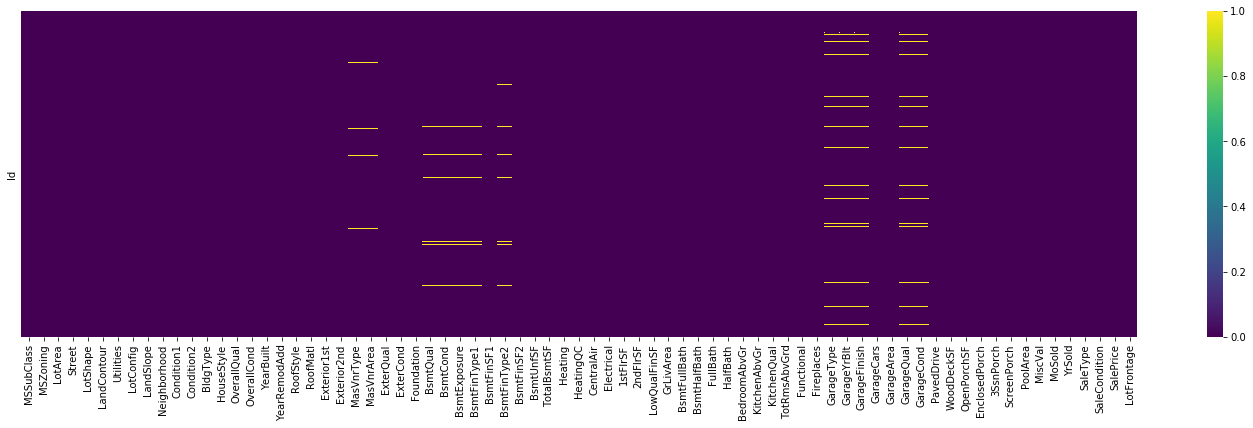

In [35]:
fig = plt.figure(figsize=(25,6))
sns.heatmap(df_train.isnull(), annot=False, yticklabels=False, cmap='viridis')

In [36]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [37]:
# not many null values for MasVnrType (and MasVnrArea) so drop their NaN values
df_train.dropna(subset=['MasVnrType'], inplace=True)

In [38]:
# Now look at Bsmt predictors

#BsmtQual , 2.5342465753424657
#BsmtCond , 2.5342465753424657
#BsmtExposure , 2.6027397260273974
#BsmtFinType1 , 2.5342465753424657
#BsmtFinSF1 , 0.0
#BsmtFinType2 , 2.6027397260273974

df_train['BsmtExposure'].value_counts()

No    946
Av    221
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64

In [39]:
df_train.groupby('BsmtExposure').mean()['SalePrice']

BsmtExposure
Av    206643.420814
Gd    256131.082707
Mn    192789.657895
No    165369.729387
Name: SalePrice, dtype: float64

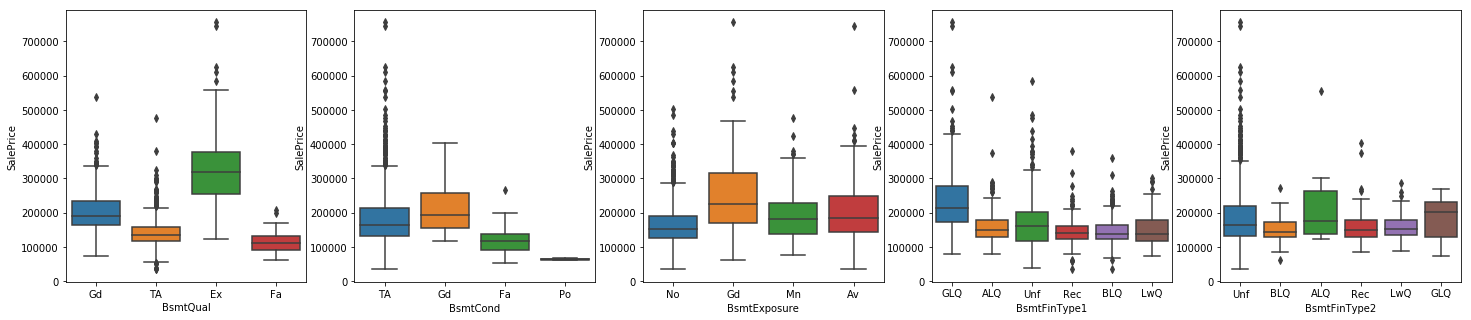

In [40]:
fig, ax = plt.subplots(1,5, figsize=(25,5))
sns.boxplot(x='BsmtQual', y='SalePrice', data=df_train, ax=ax[0])
sns.boxplot(x='BsmtCond', y='SalePrice', data=df_train, ax=ax[1])
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_train, ax=ax[2])
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=df_train, ax=ax[3])
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=df_train, ax=ax[4])

In [41]:
# There is some predictive power for these, but hard to correlate with other vars
# e.g. BsmtQual is height of basement
len(df_train.dropna(subset=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']))/len(df_train)

0.9731404958677686

In [42]:
# However, from documentation, NaN means no basement. Let's instead fill the NaN values with the string 'Un' (unavailable)
# FIRST WE DO A TEST, MAKING A NEW DF CALLED bsmtvalues_test

def fill_basement_nan(bsmtvalues):
    
    if (pd.isnull(bsmtvalues['BsmtQual']) and pd.isnull(bsmtvalues['BsmtCond']) and 
        pd.isnull(bsmtvalues['BsmtExposure']) and pd.isnull(bsmtvalues['BsmtFinType1']) and
        pd.isnull(bsmtvalues['BsmtFinType2'])):
        
        bsmtvalues['BsmtQual'] = "UN"
        bsmtvalues['BsmtCond'] = "UN"
        bsmtvalues['BsmtExposure'] = "UN"
        bsmtvalues['BsmtFinType1'] = "UN"
        bsmtvalues['BsmtFinType2'] = "UN"
        
    return bsmtvalues
  


        
bsmtvalues_test = df_train.apply(fill_basement_nan, axis=1)

In [43]:
# BEFORE REMOVED NANs
nan_df = df_train[pd.isnull(df_train['BsmtQual'])][['BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']]
nan_df.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN


In [44]:
# AFTER REMOVED NANs
fixed_nan_df = bsmtvalues_test[pd.isnull(df_train['BsmtQual'])][['BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']]
fixed_nan_df.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,UN,UN,UN,UN,UN
40,UN,UN,UN,UN,UN
91,UN,UN,UN,UN,UN
103,UN,UN,UN,UN,UN
157,UN,UN,UN,UN,UN


In [45]:
# This worked so set df_train tobsmtvalues_test
df_train = bsmtvalues_test

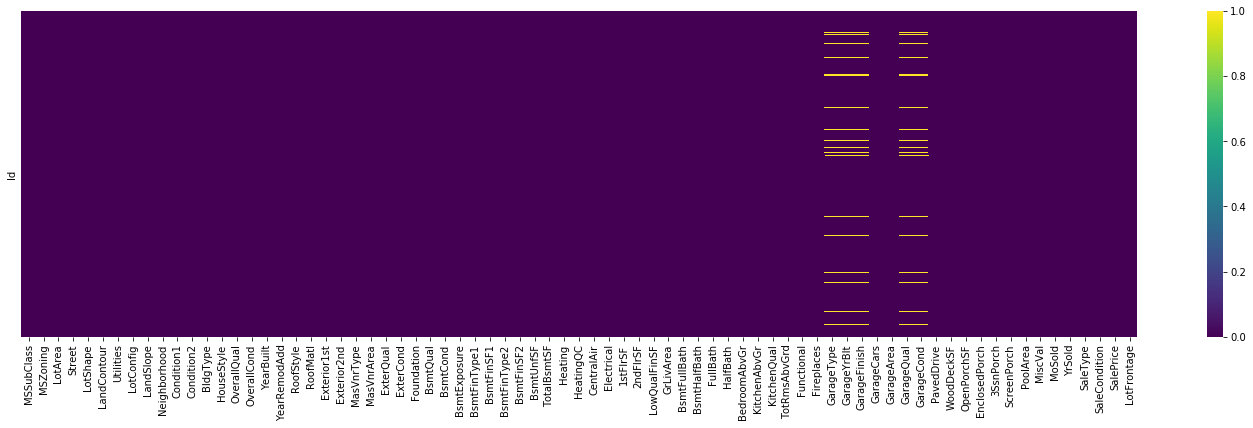

In [46]:
fig = plt.figure(figsize=(25,6))
sns.heatmap(df_train.isnull(), annot=False, yticklabels=False, cmap='viridis')

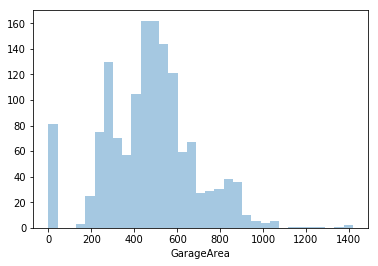

In [47]:
# Fix missing harage entries - NaN means no garage
# Can see this by looking at GarageArea

#% missing vals
#GarageType , 5.5479452054794525
#GarageYrBlt , 5.5479452054794525
#GarageFinish , 5.5479452054794525
#GarageCars , 0.0
#GarageArea , 0.0
#GarageQual , 5.5479452054794525
#GarageCond , 5.5479452054794525

sns.distplot(df_train['GarageArea'], kde=False)

In [48]:
df_train[df_train['GarageArea']==0][['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,
40,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN


In [49]:
# could do same function as before (look to see in null values in all 5 cols)
# but instead I'll do another one for fun (if GarageArea=0)

def fill_garage_nan(garagevalues):
    if garagevalues['GarageArea'] == 0:
        garagevalues['GarageType'] = 'UN'
        garagevalues['GarageYrBlt'] = 'UN'
        garagevalues['GarageFinish'] = 'UN'
        garagevalues['GarageQual'] = 'UN'
        garagevalues['GarageCond'] = 'UN'
        
    return garagevalues

garagevalues_test = df_train.apply(fill_garage_nan, axis=1)

In [50]:
# BEFORE
df_train[df_train['GarageArea']==0][['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,
40,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1350,NaN,NaN,NaN,NaN,NaN
1408,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [51]:
# AFTER
garagevalues_test[df_train['GarageArea']==0][['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,
40,UN,UN,UN,UN,UN
49,UN,UN,UN,UN,UN
79,UN,UN,UN,UN,UN
89,UN,UN,UN,UN,UN
90,UN,UN,UN,UN,UN
...,...,...,...,...,...
1350,UN,UN,UN,UN,UN
1408,UN,UN,UN,UN,UN
1450,UN,UN,UN,UN,UN


In [52]:
# This worked so set df_train to garagevalues_test
df_train = garagevalues_test

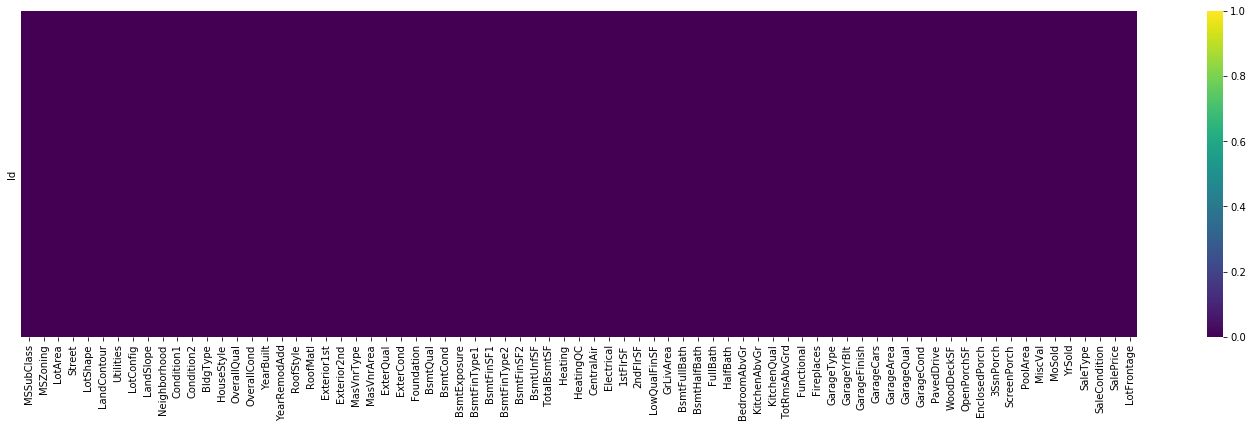

In [53]:
fig = plt.figure(figsize=(25,6))
sns.heatmap(df_train.isnull(), annot=False, yticklabels=False, cmap='viridis')

In [54]:
# proportions of null values:
obj = pd.isnull(df_train).sum()
for key,value in obj.iteritems():
    print(key,",",100*value/len(df_train))

MSSubClass , 0.0
MSZoning , 0.0
LotArea , 0.0
Street , 0.0
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.0
MasVnrArea , 0.0
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 0.0
BsmtCond , 0.0
BsmtExposure , 0.06887052341597796
BsmtFinType1 , 0.0
BsmtFinSF1 , 0.0
BsmtFinType2 , 0.06887052341597796
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
Electrical , 0.06887052341597796
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
KitchenQual , 0.0
TotRmsAbvGrd , 0.0
Functional , 0.0
Fireplaces , 0.0
GarageType , 0.0
GarageYrBlt , 0.0
GarageFini

In [55]:
# A few remaining missing ones so just remove them
df_train.dropna(inplace=True)

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   int64  
 1   MSZoning       1449 non-null   object 
 2   LotArea        1449 non-null   int64  
 3   Street         1449 non-null   object 
 4   LotShape       1449 non-null   object 
 5   LandContour    1449 non-null   object 
 6   Utilities      1449 non-null   object 
 7   LotConfig      1449 non-null   object 
 8   LandSlope      1449 non-null   object 
 9   Neighborhood   1449 non-null   object 
 10  Condition1     1449 non-null   object 
 11  Condition2     1449 non-null   object 
 12  BldgType       1449 non-null   object 
 13  HouseStyle     1449 non-null   object 
 14  OverallQual    1449 non-null   int64  
 15  OverallCond    1449 non-null   int64  
 16  YearBuilt      1449 non-null   int64  
 17  YearRemodAdd   1449 non-null   int64  
 18  RoofStyl

# Remove data leakage predictors

In [57]:
df_train.drop(['YrSold','MoSold','SaleType','SaleCondition'], axis=1, inplace=True)

# Now to convert some vars to dummies (that will be useful)

In [58]:
one_hot_list = list(df_train.select_dtypes(include='object').columns)
print(one_hot_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


In [59]:
df_train['MSZoning'].value_counts()

RL         1143
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [60]:
df_train['Street'].value_counts()
# so few gravel entries so delete column

Pave    1443
Grvl       6
Name: Street, dtype: int64

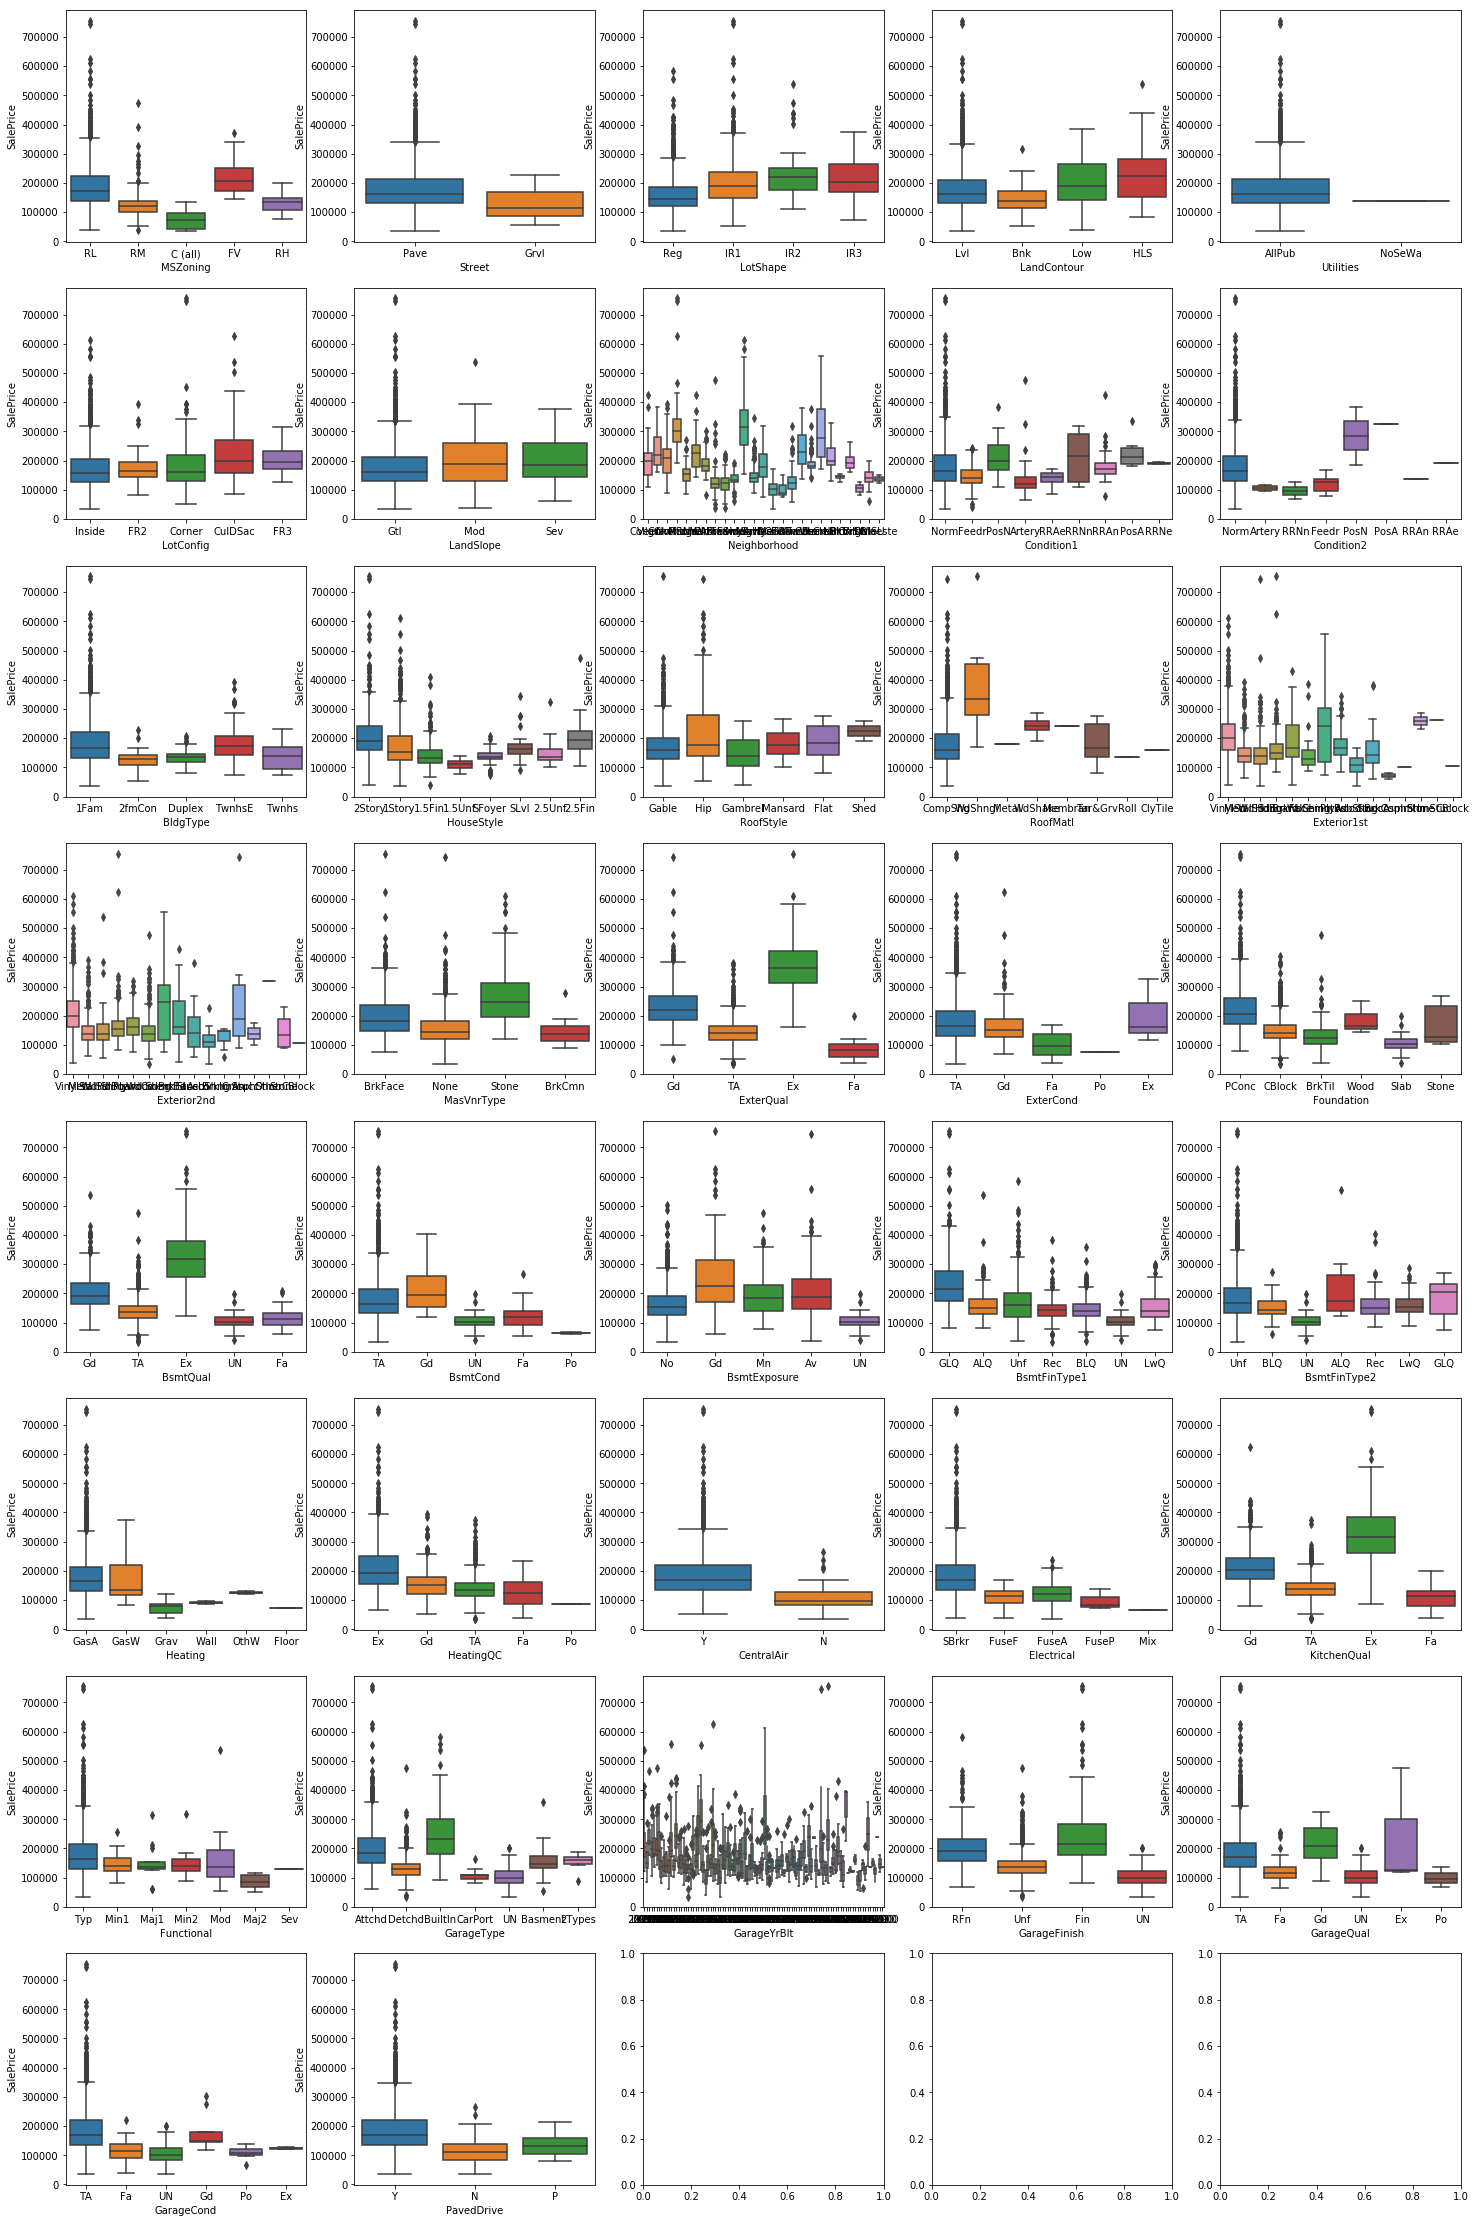

In [61]:
# 37 'object' type predictors that would need to be one-hot encoded.  Let's see if they are good predictors of sales price first
fig2, ax2 = plt.subplots(8, 5, figsize=(25,40))

i = 0
j = 0
for item in one_hot_list:
    sns.boxplot(x=item, y='SalePrice', data=df_train, ax=ax2[i][j])
    j += 1
    if j%5 == 0: 
        i += 1
        j = 0


In [62]:
for item in one_hot_list:
    print(item)
    print(df_train[item].value_counts())
    print('\n')

MSZoning
RL         1143
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street
Pave    1443
Grvl       6
Name: Street, dtype: int64


LotShape
Reg    918
IR1    480
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour
Lvl    1300
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities
AllPub    1448
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig
Inside     1043
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope
Gtl    1371
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood
NAmes      225
CollgCr    148
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     75
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     50
Mitchel     49
NoRidge     41
Timber      37
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill   

In [63]:
# FROM ALL OF ABOVE:

# Keep MSZoning, MassVnrType, ExterQual!, 
#     BsmtQual!, HeatingQC, KitchenQual!, GarageFinish, 

# Remove Street (too few in some cats), Utilities (too few in some cats), LotShape, LandContour, LotConfig,
#        LandSlope (too few in some cats), BldgType (correlated with MSZoning), HouseStyle (too many cats and outliers)
#        Neighborhood (too many cats), Condition1, Condition2, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, 
#        Foundation, BsmtOTHERS, Heating, CentralAir, Electrical, Functional, GarageType, GarageYrBuilt, 
#        GarageQual, GarageCond, PavedDrive, ExterCond


df_train.drop(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 
                'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'Heating', 'CentralAir', 'Electrical', 'Functional', 
                'GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'PavedDrive', 'ExterCond'], axis=1, inplace=True)


In [64]:
dummies = pd.get_dummies(data=df_train[['MSZoning','MasVnrType','ExterQual','BsmtQual','HeatingQC','KitchenQual','GarageFinish']], drop_first=True)
df_train = pd.concat([df_train.drop(['MSZoning','MasVnrType','ExterQual','BsmtQual','HeatingQC','KitchenQual','GarageFinish'], axis=1), 
                     dummies], axis=1)

In [65]:
df_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LotFrontage',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_UN', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageFinish_RFn',
       'GarageFinish_UN', 'GarageFinish_Unf'],
      dtype='obje

In [66]:
dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_UN', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageFinish_RFn',
       'GarageFinish_UN', 'GarageFinish_Unf'],
      dtype='object')

# Now look to see if we can drop some continuous  vars

In [67]:
continuous_list = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LotFrontage']

34


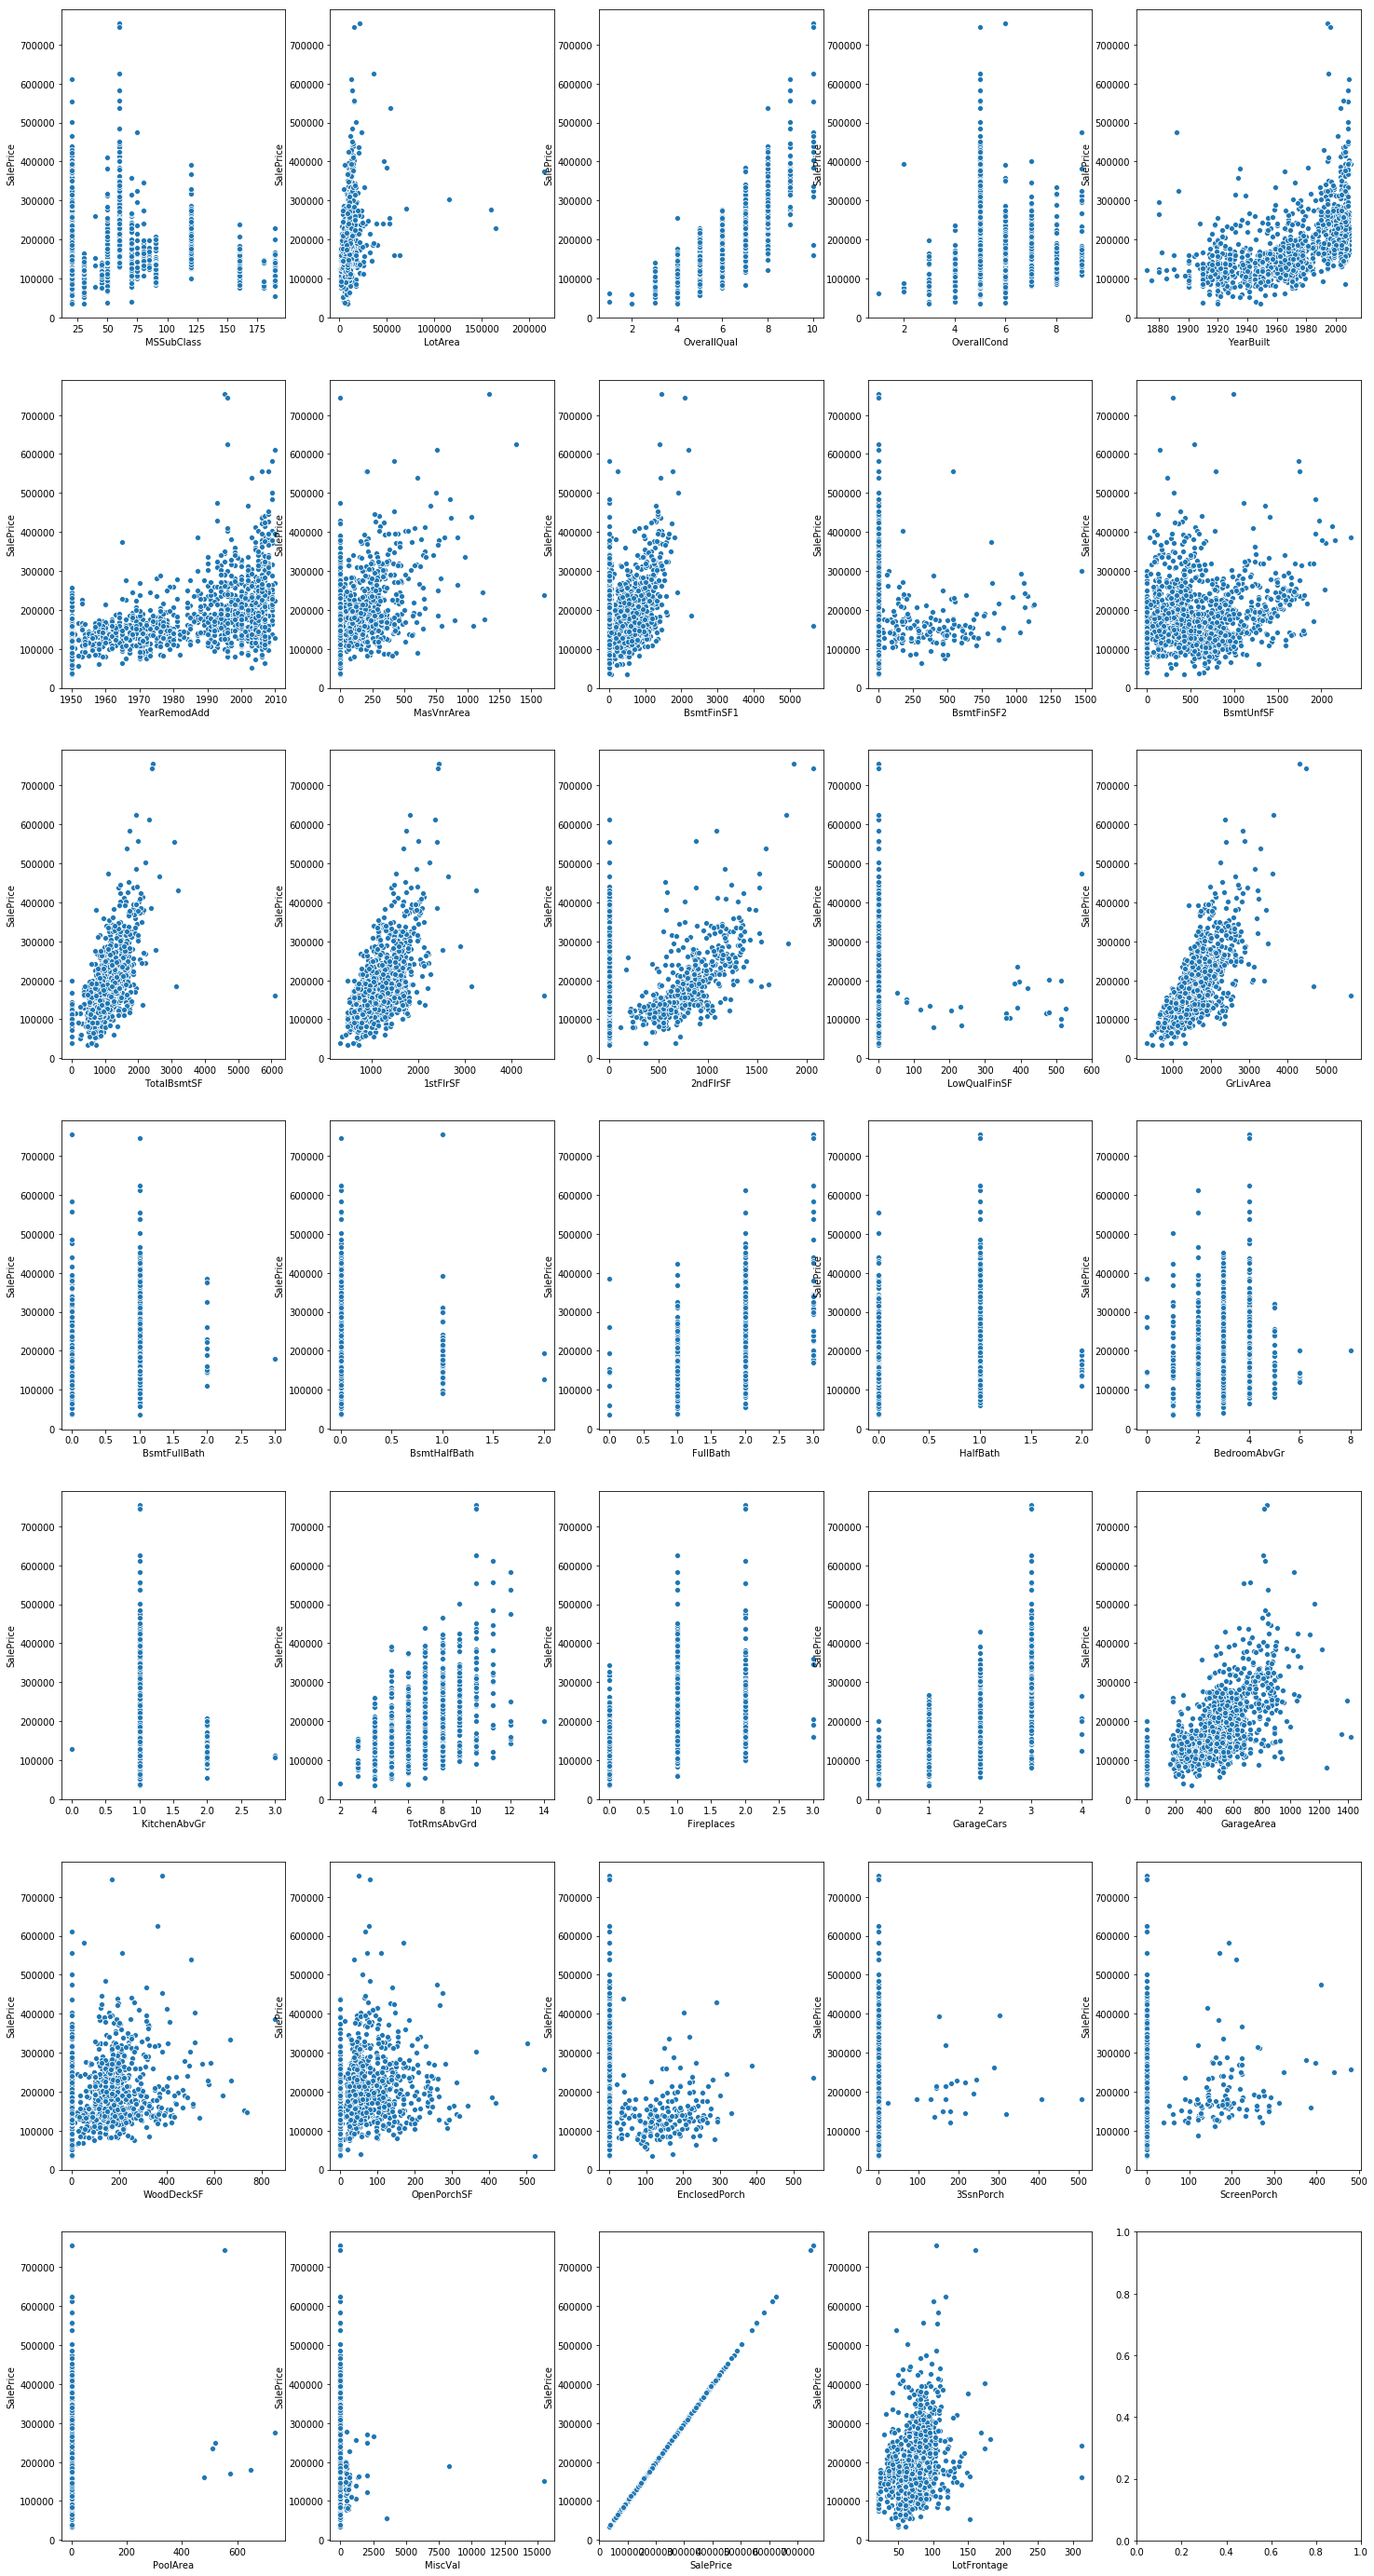

In [68]:
print(len(continuous_list))
fig3, ax3 = plt.subplots(7,5, figsize=(25,50))

i = 0
j = 0

#sns.scatterplot(data=df_train, x='PoolArea', y='SalePrice')

for item in continuous_list:
    #print(item)
    sns.scatterplot(x=item, y='SalePrice', data=df_train, ax=ax3[i][j])
    j += 1
    if j%5 == 0:
        i += 1
        j = 0

In [69]:
# GET RID OF MSSubClass, MSZoning, LotArea, LowQualFinSF, BsmtFullBath, BsmtHalfBath, HalfBath, KitchenAbvGr,
#            3SsnPorch, ScreenPorch, PoolArea, MiscVal

df_train.drop(['MSSubClass', 'LotArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
               'HalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
              axis=1, inplace=True)


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 1460
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OverallQual         1449 non-null   int64  
 1   OverallCond         1449 non-null   int64  
 2   YearBuilt           1449 non-null   int64  
 3   YearRemodAdd        1449 non-null   int64  
 4   MasVnrArea          1449 non-null   float64
 5   BsmtFinSF1          1449 non-null   int64  
 6   BsmtFinSF2          1449 non-null   int64  
 7   BsmtUnfSF           1449 non-null   int64  
 8   TotalBsmtSF         1449 non-null   int64  
 9   1stFlrSF            1449 non-null   int64  
 10  2ndFlrSF            1449 non-null   int64  
 11  GrLivArea           1449 non-null   int64  
 12  FullBath            1449 non-null   int64  
 13  BedroomAbvGr        1449 non-null   int64  
 14  TotRmsAbvGrd        1449 non-null   int64  
 15  Fireplaces          1449 non-null   int64  
 16  Garage

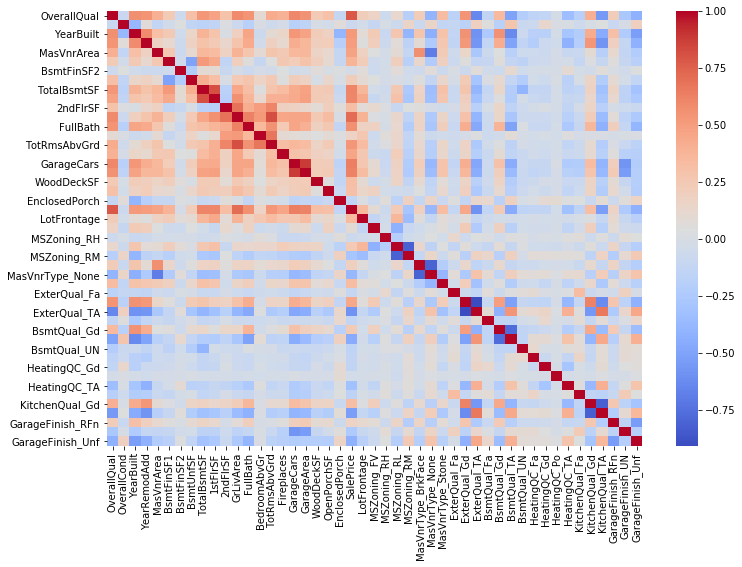

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cmap='coolwarm')

In [72]:
df_train.isnull().sum()

OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
MasVnrArea            0
BsmtFinSF1            0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
1stFlrSF              0
2ndFlrSF              0
GrLivArea             0
FullBath              0
BedroomAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageCars            0
GarageArea            0
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
SalePrice             0
LotFrontage           0
MSZoning_FV           0
MSZoning_RH           0
MSZoning_RL           0
MSZoning_RM           0
MasVnrType_BrkFace    0
MasVnrType_None       0
MasVnrType_Stone      0
ExterQual_Fa          0
ExterQual_Gd          0
ExterQual_TA          0
BsmtQual_Fa           0
BsmtQual_Gd           0
BsmtQual_TA           0
BsmtQual_UN           0
HeatingQC_Fa          0
HeatingQC_Gd          0
HeatingQC_Po          0
HeatingQC_TA          0
KitchenQual_Fa  

In [73]:
len(df_train)

1449